   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

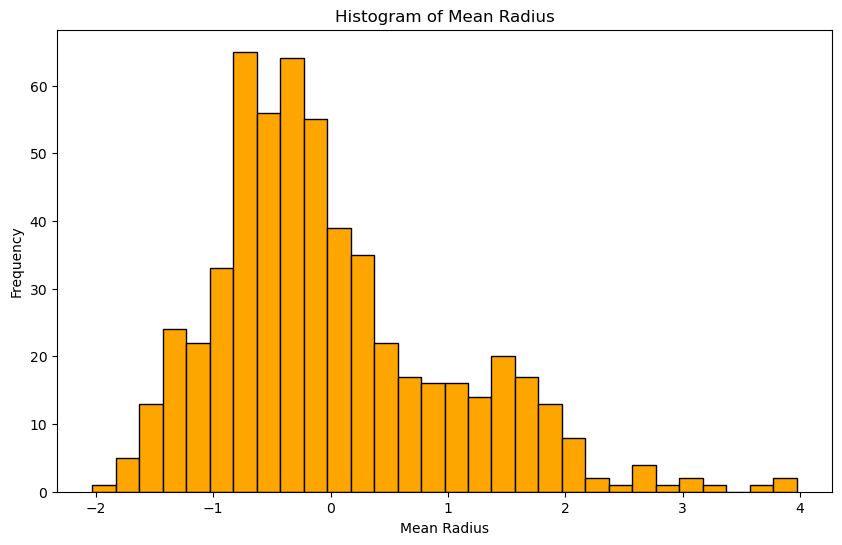

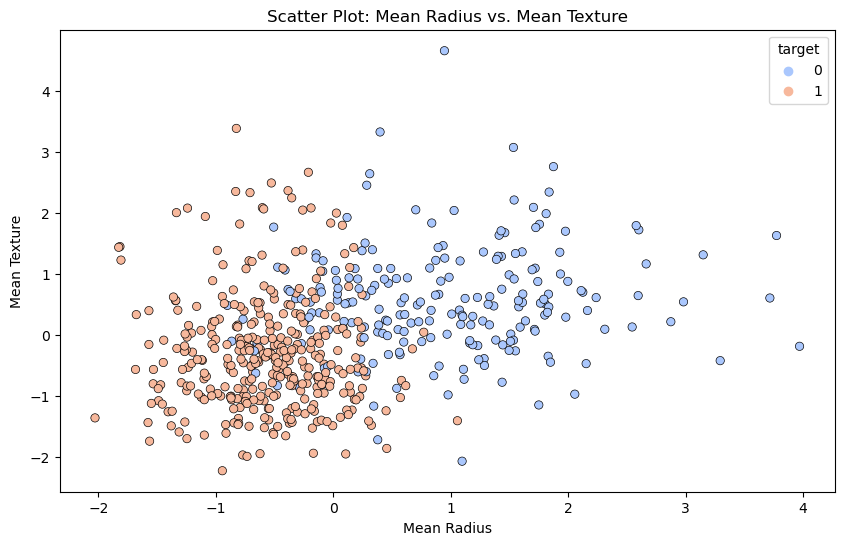

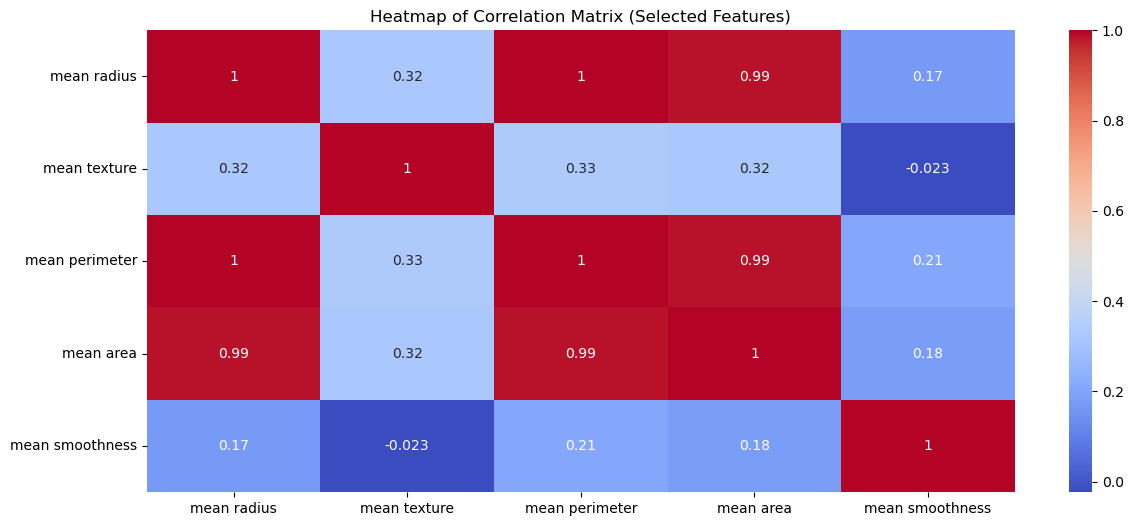

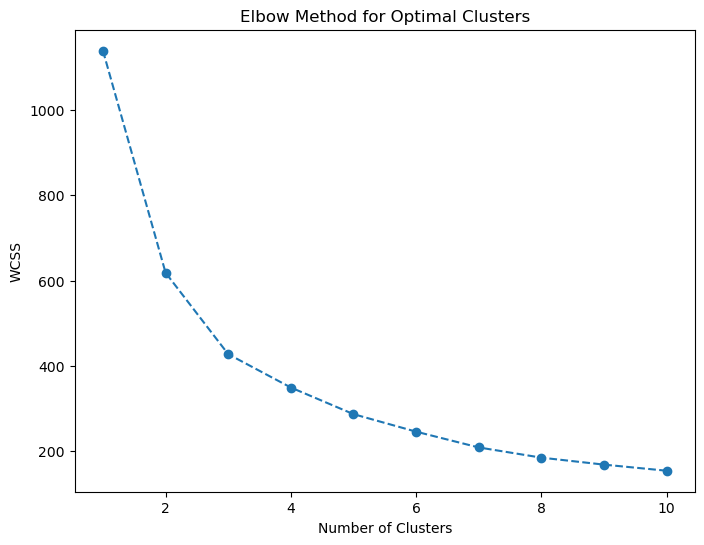

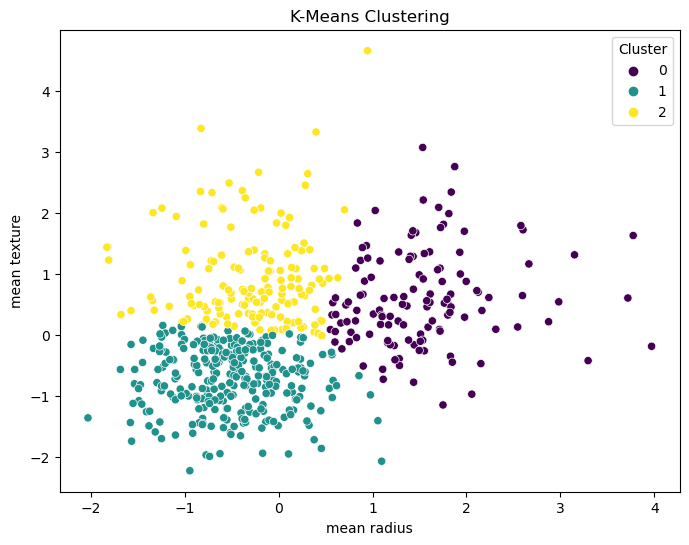

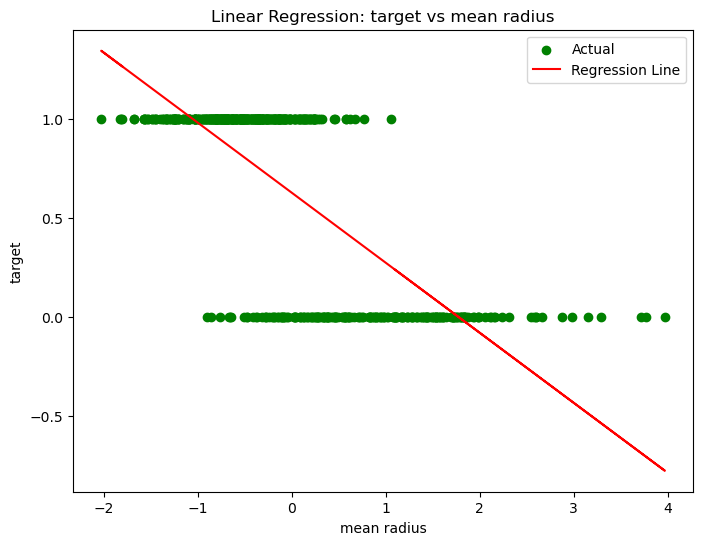

Coefficients: [-0.35296333]
Intercept: 0.6274165202108952
Mean Squared Error: 0.10918191465390865
R² Score: 0.532941627421065


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the dataset
print(df.head())

# Summary of the dataset
print(df.info())

# Handle missing values (if any) using imputation
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Standardize features for clustering and regression
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# 1. Histogram of Mean Radius
def plot_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['mean radius'], bins=30, color='orange', edgecolor='k')
    plt.title('Histogram of Mean Radius')
    plt.xlabel('Mean Radius')
    plt.ylabel('Frequency')
    plt.savefig('histogram_mean_radius.png')
    plt.show()
    plt.close()

# 2. Scatter Plot of Mean Radius vs Mean Texture
def plot_scatter(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='target', palette='coolwarm', edgecolor='k')
    plt.title('Scatter Plot: Mean Radius vs. Mean Texture')
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.savefig('scatter_mean_radius_vs_mean_texture.png')
    plt.show()
    plt.close()

# 3. Heatmap of Correlation Matrix
def plot_heatmap(df):
    plt.figure(figsize=(14, 6))
    columns_to_use = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
    correlation_matrix = df[columns_to_use].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Correlation Matrix (Selected Features)')
    plt.savefig('heatmap_correlation_matrix.png')
    plt.show()
    plt.close()

# 4. K-Means Clustering
def kmeans_clustering(df, features, n_clusters=3):
    X = df[features]

    # Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the elbow method
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster', data=df, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.show()

# 5. Linear Regression
def linear_regression_fit(df, x_column, y_column):
    X = df[[x_column]]
    y = df[y_column]

    # Initialize the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='green', label='Actual')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title(f'Linear Regression: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

    # Displaying model metrics
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    print(f'Mean Squared Error: {mean_squared_error(y, y_pred)}')
    print(f'R² Score: {r2_score(y, y_pred)}')

# Generate all plots
plot_histogram(df)
plot_scatter(df)
plot_heatmap(df)

# Example usage of clustering and regression
kmeans_clustering(df, ['mean radius', 'mean texture'])
linear_regression_fit(df, 'mean radius', 'target')

# Save the updated dataframe with clusters
df.to_csv('Breast_Cancer_Data_with_Clusters.csv', index=False)
